# Optimizing Marketing Channel Mix for Maximum Sales

In [2]:
#import and view the data 
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score 
from scipy.optimize import minimize 
import seaborn as sns 
import matplotlib.pyplot as plt 
#create a pandas dataframe from the data 
df = pd.read_csv('advertising.csv')
df.head()

,Date,TV,Radio,Newspaper,Sales
0,"Thursday, January 1, 2015",230.1,37.8,69.2,22.1
1,"Thursday, January 8, 2015",44.5,39.3,45.1,10.4
2,"Thursday, January 15, 2015",17.2,45.9,69.3,9.3
3,"Thursday, January 22, 2015",151.5,41.3,58.5,18.5
4,"Thursday, January 29, 2015",180.8,10.8,58.4,12.9


In [3]:
df.columns

Index(['Date', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
df=df[['TV', 'Radio', 'Newspaper', 'Sales']]
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Visualize the Data

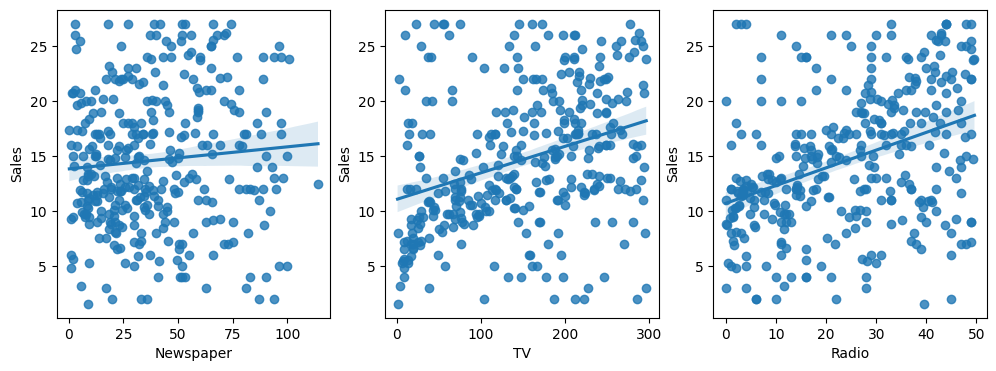

In [5]:
#create a figure with 3 subplots 

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(12,4))
#iterate over the variables and plot the regression line on each subplot 

for i, channel in enumerate(['Newspaper', 'TV', 'Radio']): 
    sns.regplot(x=channel, y='Sales', data=df, ax=axes[i])
    axes[i].set_xlabel(channel)
    axes[i].set_ylabel('Sales')

In [6]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,-0.011530,-0.017961,0.330256
Radio,-0.011530,1.000000,0.225856,0.384104
Newspaper,-0.017961,0.225856,1.000000,0.085297
Sales,0.330256,0.384104,0.085297,1.000000


<AxesSubplot:>

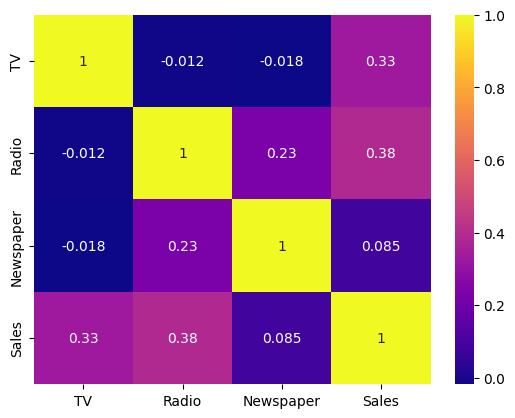

In [13]:
sns.heatmap(data=df.corr(), annot=True, cmap="plasma")

## Create a Linear Regression Model

In [16]:
#create a regression model 

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y)

model = LinearRegression()
model.fit(X_train, y_train)

#get coefficients 
coefficients = model.coef_
intercept = model.intercept_

In [17]:
print(f"The model R2 is {round(r2_score(y_test, model.predict(X_test)),2)}")
print(f"The mean squared error is {mean_squared_error(y_test, model.predict(X_test))}")

The model R2 is 0.25
The mean squared error is 29.80959347147455


In [18]:
pd.DataFrame(zip(X.columns, coefficients), columns = ['channel', 'coefficients'])

,channel,coefficients
0,TV,0.021893
1,Radio,0.170727
2,Newspaper,-0.004930


## Create Your Optimization Model